In [1]:
# Script that takes all the smaller forest loss data and combines it into one file

import netCDF4 as nc4
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import dateutil.parser
import datetime as dt
import scipy
import xarray as xr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from netCDF4 import Dataset
from netCDF4 import num2date

import cartopy.feature as cfeat
import os
import numpy as np
from cartopy import config
import matplotlib.colors as mcolors

# from mpl_toolkits.basemap import Basemap

In [2]:
# File lists 
file_list = ['10N_080W', '10N_070W', '10N_060W', '00N_080W', '00N_070W', '00N_060W', '00N_050W',
              '10S_080W', '10S_070W', '10S_060W', '10S_050W', '20S_070W', '20S_060W', '20S_050W',
              '00N_040W', '50N_130W', '50N_120W', '40N_130W', '40N_120W', '60N_140W', '60N_130W',
              '60N_120W', '60N_110W', '50N_110W', '40N_110W']

# Updated file lists including middle squares
file_list = ['10N_080W', '10N_070W', '10N_060W', '00N_080W', '00N_070W', '00N_060W', '00N_050W',
              '10S_080W', '10S_070W', '10S_060W', '10S_050W', '20S_070W', '20S_060W', '20S_050W',
              '00N_040W', '50N_130W', '50N_120W', '40N_130W', '40N_120W', '60N_140W', '60N_130W',
              '60N_120W', '60N_110W', '50N_110W', '40N_110W', '30N_100W', '20N_090W']

datapath='/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/'
filepath = datapath +'Hansen_GFC-2019-v1.7_lossyear_'
file_list_len = len(file_list)
# filepath + '*.nc'

In [3]:
# File paths not including flipped ones
#import glob
#glob.glob(filepath+'*.nc')

fnames = ['/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10N_080W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10N_070W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10N_060W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_080W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_070W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_060W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_050W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10S_080W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10S_070W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10S_060W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_10S_050W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_20S_070W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_20S_060W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_20S_050W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_00N_040W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_50N_130W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_50N_120W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_40N_130W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_40N_120W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_60N_140W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_60N_130W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_60N_120W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_60N_110W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_50N_110W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_40N_110W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_30N_100W.nc',
 '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/Hansen_GFC-2019-v1.7_lossyear_20N_090W.nc']

In [6]:
#Find out how many unique latitude and longitude coordinates we should have
lons_all = []
lats_all = []
for fname in fnames:
    ds_orig = xr.open_dataset(fname)
    #print('--------------')
    #print(np.shape(ds_orig['lon'].values))
    for val in ds_orig['lon'].values:
        lons_all.append(val)
    for val in ds_orig['lat'].values:
        lats_all.append(val)
        
print('# Unique Longitude Coords: '+str(np.shape(np.unique(lons_all))))
print('# Unique Latitude Coords: '+str(np.shape(np.unique(lats_all))))

# Unique Longitude Coords: (110,)
# Unique Latitude Coords: (90,)


In [4]:
# Change this to wherever you want these files to go
outpath = '/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/'

In [10]:
'''
# Saves files with new lat and lon
for fname in fnames:
    ds_orig = xr.open_dataset(fname)
    da_orig_mean = ds_orig['Percent']
    da = xr.DataArray(
    data=da_orig_mean.values,
    dims=["lat", "lon", "year"],
        coords=dict(
            lon=(da_orig_mean.lon),
            lat=(da_orig_mean.lat),
            year=(da_orig_mean.year),
        )
    )
    
    ds = da.to_dataset(name='Percent')

    fname_out_prefix = fname.split('/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/')[1].split('.nc')[0]
    fname_out = fname_out_prefix+'_new.nc'
    ds.to_netcdf(outpath+fname_out)
'''

'\n# Saves files with new lat and lon\nfor fname in fnames:\n    ds_orig = xr.open_dataset(fname)\n    da_orig_mean = ds_orig[\'Percent\']\n    da = xr.DataArray(\n    data=da_orig_mean.values,\n    dims=["lat", "lon", "year"],\n        coords=dict(\n            lon=(da_orig_mean.lon),\n            lat=(da_orig_mean.lat),\n            year=(da_orig_mean.year),\n        )\n    )\n    \n    ds = da.to_dataset(name=\'Percent\')\n\n    fname_out_prefix = fname.split(\'/home/disk/eos3/aswann/Shared/Data/forestmaps/hansen_landsat_forestloss/\')[1].split(\'.nc\')[0]\n    fname_out = fname_out_prefix+\'_new.nc\'\n    ds.to_netcdf(outpath+fname_out)\n'

In [5]:
# Loads all the new files as one
ds_merged = xr.open_mfdataset(outpath+'*_new.nc', combine='by_coords')

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


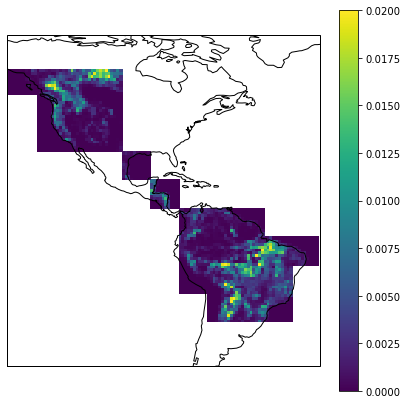

In [6]:
projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(7,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -30, 60])

    #cyclic_data, cyclic_lons = add_cyclic_point(ds_orig['Percent'].mean(dim='year'), coord=ds_orig['lon'])
cs = plt.pcolor(ds_merged['lon'], ds_merged['lat'], ds_merged['Percent'].mean(dim='year'),
                            transform=ccrs.PlateCarree(), vmin=0, vmax=0.02)
plt.colorbar()

In [11]:
ds_merged_small = ds_merged.Percent[:,:,:16]
%store ds_merged_small

Stored 'ds_merged_small' (DataArray)


Stored 'total' (DataArray)


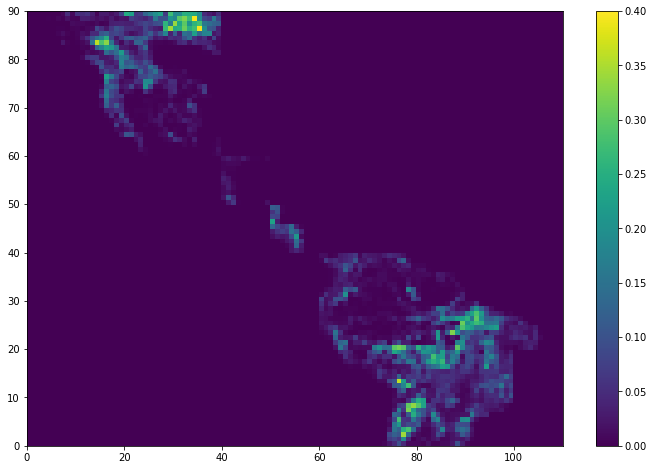

In [10]:
total = ds_merged_small.sum(dim='year')
plt.figure(figsize=(12,8))
plt.pcolor(total, vmin=0, vmax = 0.4)
plt.colorbar()

%store total


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


Text(0.5, 1.0, 'Forest Loss 2000-2015: Hansen Forest Loss Data')

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


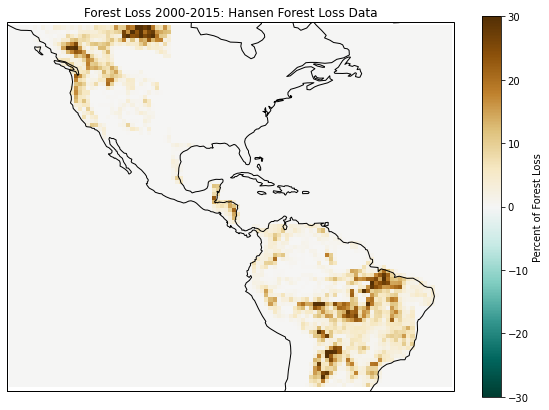

In [9]:
projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(10,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -19, 45])

    #cyclic_data, cyclic_lons = add_cyclic_point(ds_orig['Percent'].mean(dim='year'), coord=ds_orig['lon'])

    
#cs = plt.pcolor(ds_merged_small['lon'], ds_merged_small['lat'], total,
                           # transform=ccrs.PlateCarree(), cmap = 'BrBG', vmin=-.35, vmax=0.35)



cs = plt.pcolor(ds_merged_small['lon'], ds_merged_small['lat'], total*100,
                            transform=ccrs.PlateCarree(), cmap = 'BrBG_r', vmin=-30, vmax=30)


plt.colorbar(label = 'Percent of Forest Loss')
plt.title("Forest Loss 2000-2015: Hansen Forest Loss Data")

In [ ]:
projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(7,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -30, 60])

    #cyclic_data, cyclic_lons = add_cyclic_point(ds_orig['Percent'].mean(dim='year'), coord=ds_orig['lon'])
cs = plt.pcolor(ds_merged_small['lon'], ds_merged_small['lat'], ds_merged_small.mean(dim='year'),
                            transform=ccrs.PlateCarree(), vmin=0, vmax=0.02)
plt.colorbar()

In [221]:
# Takes in list of files and flips the lon and lat values. 
# Flipping may not be nessesary and caused issues with plotting

for i in range(file_list_len): #len(filenamelist)): # Loops over all file names
    file_num=file_list[i] ng
    filename = filepath + file_num
    print("Working on file #" + str(i + 1) + ": " + file_num)
    ds = xr.open_dataset(filename +".nc")
    #print(ds['lat'])

    new_lon = np.array(ds['lon'])
    new_lon = np.flip(new_lon)
   
    lat = np.array(ds['lat'])
    new_lat = np.array(ds['lat'])
    #new_lat = np.flip(new_lat)
    
    years = np.arange(2000, 2019) # Establishes the years that the data spans
    ds= (ds['Percent'])
   
    
    ds_result = xr.Dataset(
        {
            "Percent": (["lon", "lat", "year"], ds), #make the same order as result
         },
         coords={
             "lon": (["lon"], new_lon),
              "lat": (["lat"], new_lat),
             "year": years #2000-2019 just in numbers
      },
    )
    
    ds_result.to_netcdf(filename +"flipped_2.nc")

SyntaxError: invalid syntax (<ipython-input-221-a33003417e16>, line 5)

In [163]:
"""
Tests smaller files, used to resolve isssues of stripes being formed in negative space

ds_small = xr.open_dataset(filepath + file_list[0] + '.nc')
ds_small2 = xr.open_dataset(filepath + file_list[1] + '.nc')
ds_small3 = xr.open_dataset(filepath + file_list[24] + '.nc')

ds_2 = xr.combine_by_coords([ds_small, ds_small2, ds_small3])
ds_2.Percent[:,:,7].plot(y = 'lat', vmin = 0, vmax = 0.05)
"""

"\nTests smaller files, used to resolve isssues of stripes being formed in negative space\n\nds_small = xr.open_dataset(filepath + file_list[0] + '.nc')\nds_small2 = xr.open_dataset(filepath + file_list[1] + '.nc')\nds_small3 = xr.open_dataset(filepath + file_list[24] + '.nc')\n\nds_2 = xr.combine_by_coords([ds_small, ds_small2, ds_small3])\nds_2.Percent[:,:,7].plot(y = 'lat', vmin = 0, vmax = 0.05)\n"

In [215]:
ds_small = xr.open_dataset(filepath + file_list[0] + '.nc')
ds_small

<xarray.Dataset>
Dimensions:  (lat: 10, lon: 10, year: 19)
Coordinates:
  * lon      (lon) float64 -79.5 -78.5 -77.5 -76.5 ... -73.5 -72.5 -71.5 -70.5
  * lat      (lat) float64 9.5 8.5 7.5 6.5 5.5 4.5 3.5 2.5 1.5 0.5
  * year     (year) int64 2000 2001 2002 2003 2004 ... 2014 2015 2016 2017 2018
Data variables:
    Percent  (lon, lat, year) float64 ...

In [164]:
# Opens all data as one dataset, this one is using the flipped by lon and lat files

ds = xr.open_mfdataset(filepath + '*flipped_2.nc', combine = 'by_coords', concat_dim="lat")

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


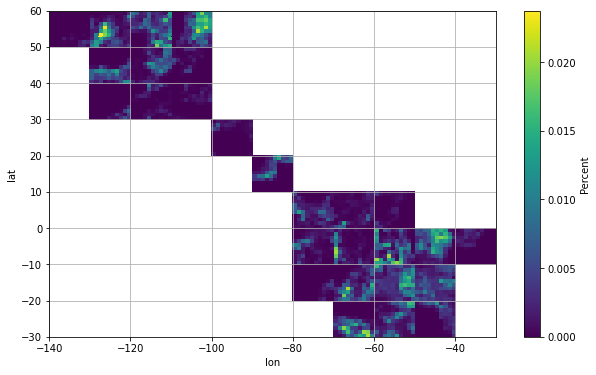

In [197]:
# Rough plot of data, mean by years
# May be flipped or plotted wrong 

fig= plt.figure(figsize=(10,6))
#ax1 = plt.axes(projection=ccrs.Robinson())
ds.Percent.mean(dim='year').plot(y = 'lat') #, vmin = 0, vmax = 0.05)
plt.grid(b=None, which='major', axis='both')

In [146]:
print(np.shape(ds_orig['Percent'].mean(dim='year')))
print(np.shape(ds_orig['lon']))

(110, 90)
(110,)


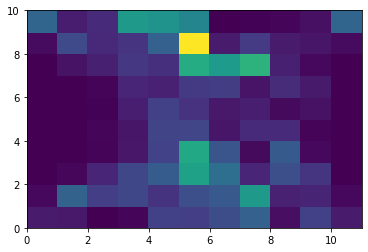

In [133]:
plt.pcolor(cyclic_data)

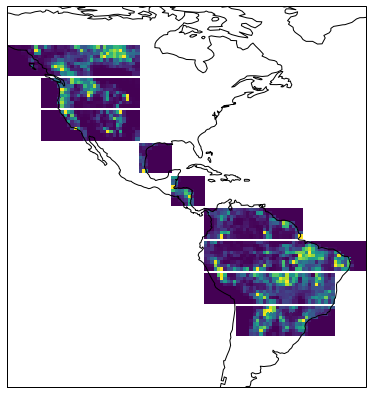

In [202]:
# Plots each square one at a time
projection = ccrs.PlateCarree()
fig= plt.figure(figsize=(7,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -30, 60])

for fname in fnames:
    ds_orig = xr.open_dataset(fname)
    cyclic_data, cyclic_lons = add_cyclic_point(ds_orig['Percent'].mean(dim='year'), coord=ds_orig['lon'])
    cs = plt.pcolor(cyclic_lons, ds_orig['lat'], cyclic_data,
                            transform=ccrs.PlateCarree())
#cs = plt.pcolor(ds_orig['lon'], ds_orig['lat'], ds_orig['Percent'].mean(dim='year'),
#                            transform=ccrs.PlateCarree())

In [ ]:
"""
# Using xarray.plot
# Not working

percent = ds.variables['Percent'][:]
p = percent.isel(year=0).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
)
"""

In [ ]:
# Using xarray.plot
# Not working

"""
lons = ds.variables['lon'][:]
lats = ds.variables['lat'][:]
ax = plt.subplot(projection=ccrs.PlateCarree())
#ds.plot.pcolormesh("lon", "lat", ax=ax)

"""

In [ ]:
# Put data into arrays, plot using matplotlib
# Not working

"""
dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()
plt.show()
"""

In [ ]:
# Plot using pcolor 
"""
percent = ds.variables['Percent'][:]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
lon, lat = np.meshgrid(lons, lats)
cs = ax.pcolor(lon[:, :180], lat[:, :180], percent[:, :180])
cs = ax.pcolor(lon[:, 180:], lat[:, 180:], percent[:, 180:])

# draw coastlines.
ax.coastlines()
ax.add_feature(cfeat.LAND)
plt.show()
"""

In [ ]:
# xarray dataset using .plot

"""
fig= plt.figure(figsize=(7,7))
ax1 = plt.axes(projection=ccrs.Robinson())
ax1.set_global()
ax1.coastlines()
ax1.set_extent([-140, -30, -30, 60])

Percent = ds.Percent
data = Percent[:,:,3]
#print(data)

data.plot(ax=ax1) #, transfrom = ccrs.PlateCarree(), vmin = 0, vmax = 0.05, cbar_kwargs= {'shrink':0.4})

#plot = ax.plot(Percent[:,:,3])

#Percent[:,:,3].plot(ax=ax1) #, add_colorbar=False, cmap='RdBu_r', vmin=-2, vmax=2)

#ds.Percent[:,:,2].plot() #y = 'lat', vmin = 0, vmax = 0.05

"""

(110, 90)
(90, 110)
(90, 110)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


TypeError: Dimensions of C (110, 90) are incompatible with X (110) and/or Y (90); see help(pcolor)

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


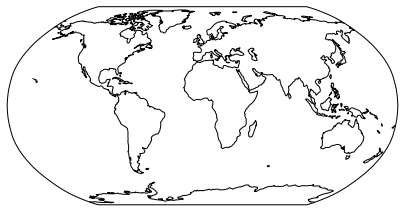

In [207]:
ds_orig_all = xr.open_mfdataset(fnames, combine = 'by_coords', concat_dim="lat")

projection = ccrs.Robinson()
fig= plt.figure(figsize=(7,7))
ax1 = plt.axes(projection=projection)
#ax1.set_global()
ax1.coastlines()
#ax1.set_extent([-140, -30, -30, 60])

Percent = ds_orig_all.Percent.mean(dim='year').values
lat_plot = ds_orig_all.lat.values 
lon_plot = ds_orig_all.lon.values + 360

lon_test, lat_test  = np.meshgrid(lon_plot, lat_plot)

data = Percent
print(data.shape)
print(lat_test.shape)
print(lon_test.shape)

#plot = ax1.pcolor(lon_test, lat_test, data, transform = ccrs.PlateCarree())
plot = ax1.pcolor(lon_plot, lat_plot, data, transform = ccrs.PlateCarree())


In [191]:
lon_test

array([[220.5, 221.5, 222.5, ..., 327.5, 328.5, 329.5],
       [220.5, 221.5, 222.5, ..., 327.5, 328.5, 329.5],
       [220.5, 221.5, 222.5, ..., 327.5, 328.5, 329.5],
       ...,
       [220.5, 221.5, 222.5, ..., 327.5, 328.5, 329.5],
       [220.5, 221.5, 222.5, ..., 327.5, 328.5, 329.5],
       [220.5, 221.5, 222.5, ..., 327.5, 328.5, 329.5]])

ValueError: The length of the coordinate does not match the size of the corresponding dimension of the data array: len(coord) = 110, data.shape[-1] = 90.

/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


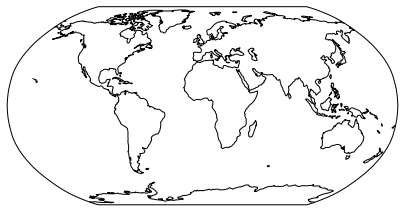

In [211]:
from cartopy.util import add_cyclic_point

# Arrays of numbers plotted using pcolor (thought it should work)
projection = ccrs.Robinson()
fig= plt.figure(figsize=(7,7))
ax1 = plt.axes(projection=projection)
#ax1.set_global()
ax1.coastlines()
#ax1.set_extent([-140, -30, -30, 60])

Percent = ds.Percent.values
lat_plot = ds.lat.values
lon_plot = ds.lon.values + 360

cyclic_data, cyclic_lons = add_cyclic_point(ds['Percent'].mean(dim='year'), coord=ds['lon'])
cs = plt.pcolormesh(cyclic_lons, lat_plot, cyclic_data,
                            transform=ccrs.PlateCarree())

data = Percent[:,:,3]
print(data.shape)
print(lat_plot.shape)
print(lon_plot.shape)
#plot = ax1.pcolor(lat_plot, lon_plot, data, transform = ccrs.PlateCarree())

In [121]:
ds['Percent'].mean(dim='year')

<xarray.DataArray 'Percent' (lon: 110, lat: 90)>
dask.array<mean_agg-aggregate, shape=(110, 90), dtype=float64, chunksize=(10, 40), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 56.5 57.5 58.5 59.5
  * lon      (lon) float64 -30.5 -31.5 -32.5 -33.5 ... -137.5 -138.5 -139.5

(110, 90)
(110, 90)
(110, 90)


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


[[-30.5 -30.5]
 [-31.5 -31.5]]
-30.5


/home/disk/p/rlys/anaconda3/envs/pangeo_copy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


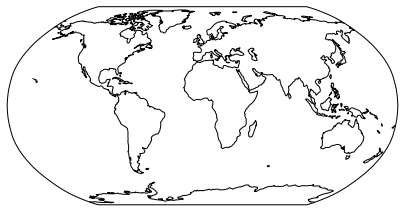

In [210]:
projection = ccrs.Robinson()
fig= plt.figure(figsize=(7,7))
ax1 = plt.axes(projection=projection)
ax1.set_global()
ax1.coastlines()
#ax1.set_extent([-140, -30, -30, 60])

Percent = ds.Percent.values
lat_plot = ds.lat.values
lon_plot = ds.lon.values

lat_test, lon_test  = np.meshgrid(lat_plot, lon_plot)

data = Percent[:,:,3]
print(data.shape)
print(lat_test.shape)
print(lon_test.shape)

plot = ax.pcolor(lat_test, lon_test, data, transform = ccrs.PlateCarree())

print(lon_test[0:2,0:2])
print(lon_plot[0])

In [109]:
print(data)
np.nanmax(data)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ...  0.  0.  0.]
 [nan nan nan ...  0.  0.  0.]
 [nan nan nan ...  0.  0.  0.]]


0.08750931168651127

TypeError: _pcolorargs() got an unexpected keyword argument 'allmatch'

/home/disk/p/rlys/anaconda3/envs/pangeo/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


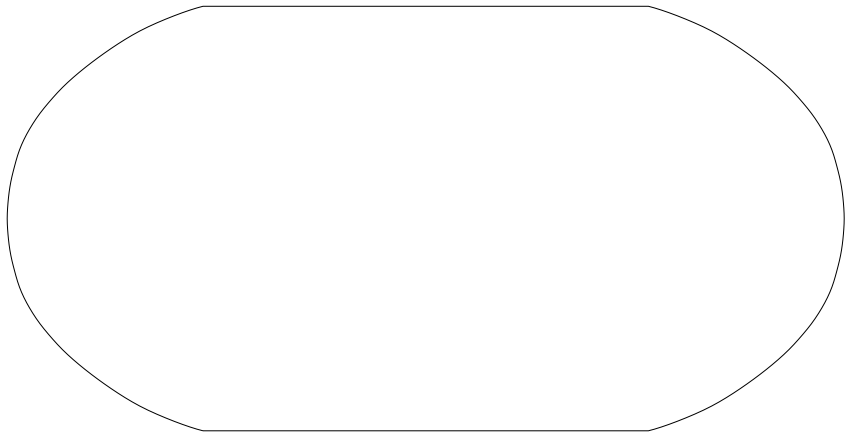

In [135]:
dstoplot = ds['Percent'][:,:,4]
fig= plt.figure(figsize=(15,15))
ax1 = plt.axes(projection=ccrs.Robinson())
#ds.Percent[:,:,4].plot(ax=ax1)

dstoplot.plot(ax=ax1)

In [25]:
ds['Percent'][:,:,4].values

array([[           nan,            nan,            nan, ...,
        2.18234103e-05, 3.31415687e-06, 9.52976429e-05],
       [           nan,            nan,            nan, ...,
        3.81440697e-06, 0.00000000e+00, 0.00000000e+00],
       [           nan,            nan,            nan, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

In [ ]:
ds.to_netcdf('')

In [ ]:


#DS = xr.open_mfdataset(file_in) #open mfdataset
